In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the Home Audio data set
home_audio=pd.read_csv('HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [3]:
# Drop unnamed variable column
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [4]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop unwanted variable columns
home_audio = home_audio.drop(['Year','Month','order_id','order_item_id','order_date','week_y','wday','week'], axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
#Renaming column
home_audio.rename({' Affiliates':'Affiliates'},axis=1, inplace=True)

In [7]:
#check the dtypes
home_audio.dtypes

gmv                              float64
units                              int64
deliverybdays                      int64
deliverycdays                      int64
s1_fact_order_payment_type        object
sla                                int64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                      float64
product_procurement_sla            int64
Pay_Day                            int64
is_holiday                         int64
special_sale                      object
Discount_Percentage              float64
gmvperunit                       float64
delivery_on_time                 float64
delivery_status                   object
Total Investment                 float64
TV                               float64
Digital                          float64
Sponsorship                      float64
Content Marketing                float64
Online marketing                 float64
SEM             

In [8]:
#Check size
home_audio.shape

(97387, 42)

In [9]:
#Checking unique values in delivery time variable 
home_audio['delivery_on_time'].unique()

array([  0.,  -3.,   4.,  -2.,  -1.,   1.,   5.,   2.,   3.,   6.,   9.,
        11.,  10.,   8.,   7.,  13.,  -4.,  12., -11.,  15.,  14.,  -5.,
       -13.,  40., -31.,  17.,  18.,  16.,  -8.,  22.,  -9.,  21.,  23.,
        -7., -21.,  -6., -12., -10., -20., -15., -19.,  20., -18., -29.,
       -14., -17., -16., -23.,  24., -22., -38., -28., -37., -45., -30.,
       -32., -26., -24., -34.,  19., -27., -41., -46., -25.])

In [10]:
#Delivery time can't be negative hence taking positive values
home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00
8,"6,850.00",1,0,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-30-10,"27,696,108.35","56,893,409.94","381,645,218.33","15,523,507.31","109,851,120.17","31,432,667.13","143,904,888.74",0.00,0.00
11,"6,700.00",1,0,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"27,743,533.19","56,990,830.16","382,298,720.42","15,550,088.66","110,039,221.40","31,486,490.19","144,151,301.22",0.00,0.00
12,"6,900.00",1,0,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-02-10,"27,746,920.68","56,997,788.75","382,345,399.14","15,551,987.33","110,052,657.20","31,490,334.69","144,168,902.11",0.00,0.00


In [11]:
#Selecting numeric data
log_cols = home_audio.select_dtypes(['float64','int64']).columns

In [12]:
#checking detail info
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gmv                            62116 non-null  float64
 1   units                          62116 non-null  int64  
 2   deliverybdays                  62116 non-null  int64  
 3   deliverycdays                  62116 non-null  int64  
 4   s1_fact_order_payment_type     62116 non-null  object 
 5   sla                            62116 non-null  int64  
 6   product_analytic_category      62116 non-null  object 
 7   product_analytic_sub_category  62116 non-null  object 
 8   product_analytic_vertical      62116 non-null  object 
 9   product_mrp                    62116 non-null  float64
 10  product_procurement_sla        62116 non-null  int64  
 11  Pay_Day                        62116 non-null  int64  
 12  is_holiday                     62116 non-null 

In [13]:
#looking for Nan values
home_audio.isnull().sum()

gmv                                  0
units                                0
deliverybdays                        0
deliverycdays                        0
s1_fact_order_payment_type           0
sla                                  0
product_analytic_category            0
product_analytic_sub_category        0
product_analytic_vertical            0
product_mrp                          0
product_procurement_sla              0
Pay_Day                              0
is_holiday                           0
special_sale                         0
Discount_Percentage                  0
gmvperunit                           0
delivery_on_time                     0
delivery_status                      0
Total Investment                     0
TV                                   0
Digital                              0
Sponsorship                          0
Content Marketing                    0
Online marketing                     0
SEM                                  0
Radio                    

In [14]:
home_audio['NPS'] = home_audio['NPS'].fillna(0)
home_audio['NPSScore'] = home_audio['NPSScore'].fillna(0)

In [15]:
#looking for Nan values
home_audio.isnull().sum()

gmv                              0
units                            0
deliverybdays                    0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
gmvperunit                       0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
Affiliates                       0
NPS                 

In [16]:
#checking log cols
log_cols = list(set(log_cols)-
                set(['gmv','units']))

In [17]:
# We will add 1 to all columns before we take log. This will make any value between 0 and 1 (like percentages) > 1
# This is done to avoid negatives in the columns as the log of numbers between 0 and 1 would be less than 

home_audio[log_cols]+=1

In [18]:
#Transforming relevant columns to logs
home_audio[log_cols] =np.log(home_audio[log_cols])

In [19]:
#checking dataframe now
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2,"6,255.00",1,0.00,0.00,Prepaid,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,2015-10-16-10,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
4,"6,850.00",1,0.00,0.00,COD,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,2015-10-20-10,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00
8,"6,850.00",1,0.00,0.00,Prepaid,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,2015-10-30-10,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00
11,"6,700.00",1,0.00,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,2015-10-16-10,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00
12,"6,900.00",1,0.00,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,2015-10-02-10,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00


In [20]:
# Drop variable columns
home_audio = home_audio.drop(['month_date'], axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2,"6,255.00",1,0.00,0.00,Prepaid,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,Luxury,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
4,"6,850.00",1,0.00,0.00,COD,2.30,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,Luxury,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00
8,"6,850.00",1,0.00,0.00,Prepaid,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,Luxury,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00
11,"6,700.00",1,0.00,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,Luxury,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00
12,"6,900.00",1,0.00,0.00,COD,1.95,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,8.92,...,Luxury,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00


In [21]:
# Subset all categorical variables
ecart_HA_numerical = home_audio.select_dtypes(include=['int64','float64'])
ecart_HA_numerical.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2,"6,255.00",1,0.00,0.00,2.30,8.92,1.79,0.00,0.69,2.87,...,1.61,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
4,"6,850.00",1,0.00,0.00,2.30,8.92,1.79,0.00,0.00,2.27,...,0.00,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00
8,"6,850.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.00,2.27,...,0.00,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00
11,"6,700.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.69,2.46,...,1.61,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00
12,"6,900.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.00,2.20,...,0.00,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00


In [22]:
#checking detail info
ecart_HA_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gmv                        62116 non-null  float64
 1   units                      62116 non-null  int64  
 2   deliverybdays              62116 non-null  float64
 3   deliverycdays              62116 non-null  float64
 4   sla                        62116 non-null  float64
 5   product_mrp                62116 non-null  float64
 6   product_procurement_sla    62116 non-null  float64
 7   Pay_Day                    62116 non-null  float64
 8   is_holiday                 62116 non-null  float64
 9   Discount_Percentage        62116 non-null  float64
 10  gmvperunit                 62116 non-null  float64
 11  delivery_on_time           62116 non-null  float64
 12  Total Investment           62116 non-null  float64
 13  TV                         62116 non-null  flo

In [23]:
# Subset all categorical variables
ecart_HA_categorical = home_audio.select_dtypes(include=['object'])
ecart_HA_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [24]:
# Convert into dummies
ecart_HA_dummies = pd.get_dummies(ecart_HA_categorical, drop_first=True)
ecart_HA_dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(ecart_HA_categorical.columns), axis=1)

In [26]:
#checking datframe now
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
2,"6,255.00",1,0.00,0.00,2.30,8.92,1.79,0.00,0.69,2.87,...,1.61,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
4,"6,850.00",1,0.00,0.00,2.30,8.92,1.79,0.00,0.00,2.27,...,0.00,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00
8,"6,850.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.00,2.27,...,0.00,17.14,17.86,19.76,16.56,18.51,17.26,18.78,0.00,0.00
11,"6,700.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.69,2.46,...,1.61,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00
12,"6,900.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.00,2.20,...,0.00,17.14,17.86,19.76,16.56,18.52,17.27,18.79,0.00,0.00


In [27]:
# Concatenate dummy variables with X
ecart_HA = pd.concat([home_audio, ecart_HA_dummies], axis=1)
ecart_HA.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0.00,0.00,2.30,8.92,1.79,0.00,0.69,2.87,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0.00,0.00,2.30,8.92,1.79,0.00,0.00,2.27,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.00,2.27,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.69,2.46,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0.00,0.00,1.95,8.92,1.79,0.00,0.00,2.20,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#checking detail info
ecart_HA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverybdays                               62116 non-null  float64
 3   deliverycdays                               62116 non-null  float64
 4   sla                                         62116 non-null  float64
 5   product_mrp                                 62116 non-null  float64
 6   product_procurement_sla                     62116 non-null  float64
 7   Pay_Day                                     62116 non-null  float64
 8   is_holiday                                  62116 non-null  float64
 9   Discount_Percentage                         62116 non-null  float64
 10  gmvperunit

In [29]:
#check size
ecart_HA.shape

(62116, 56)

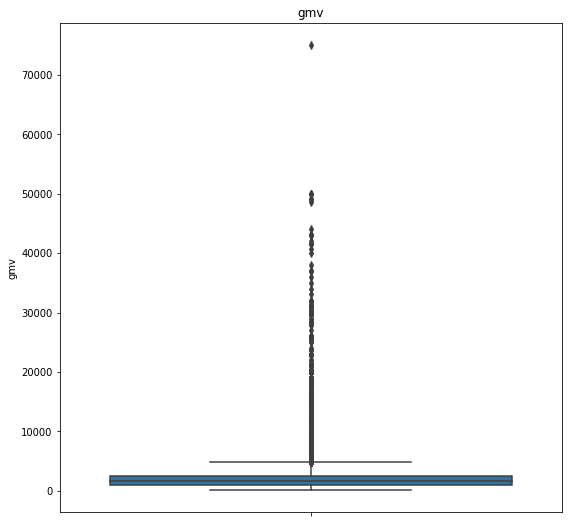

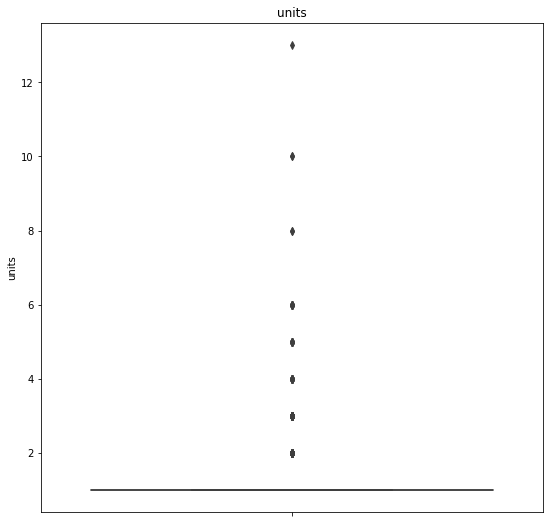

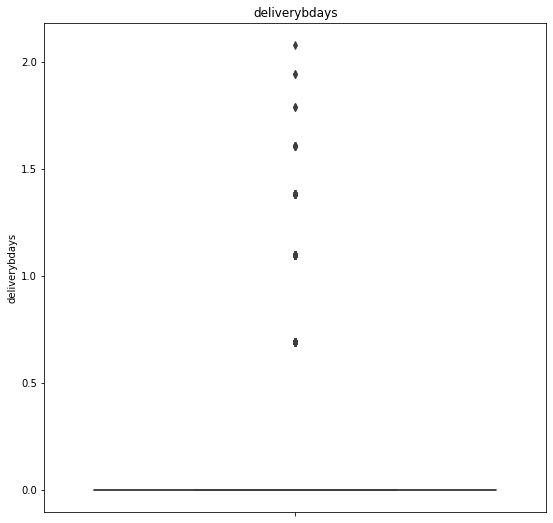

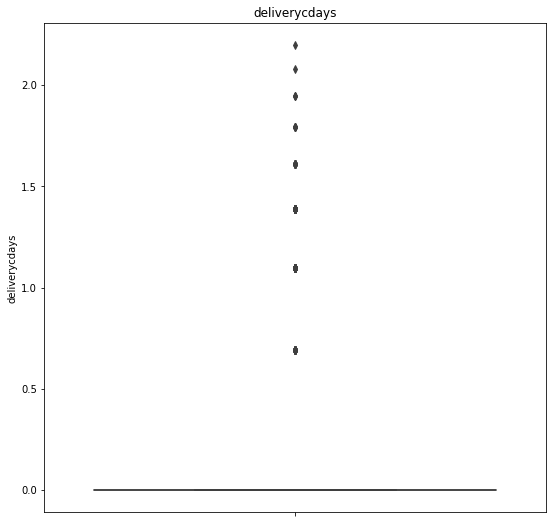

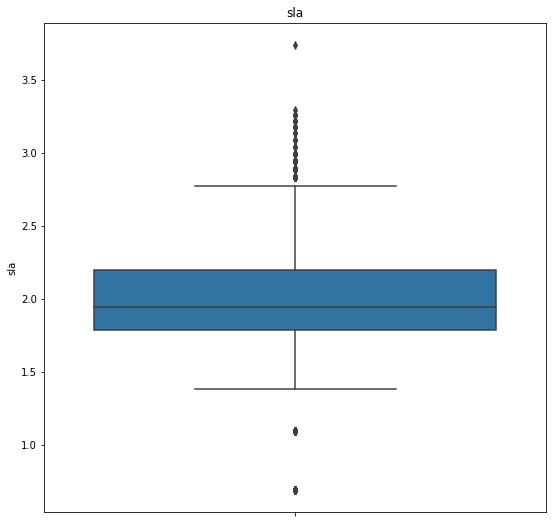

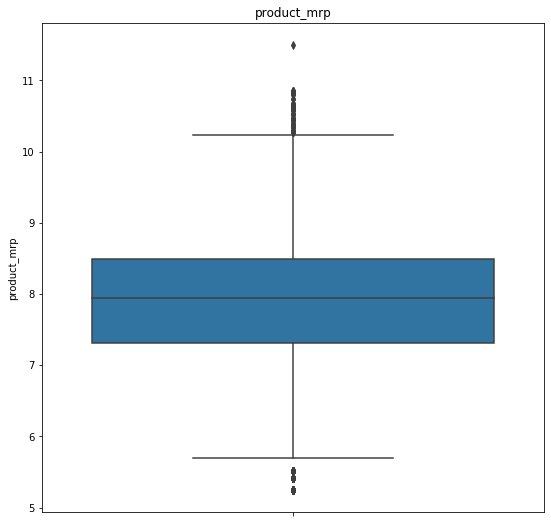

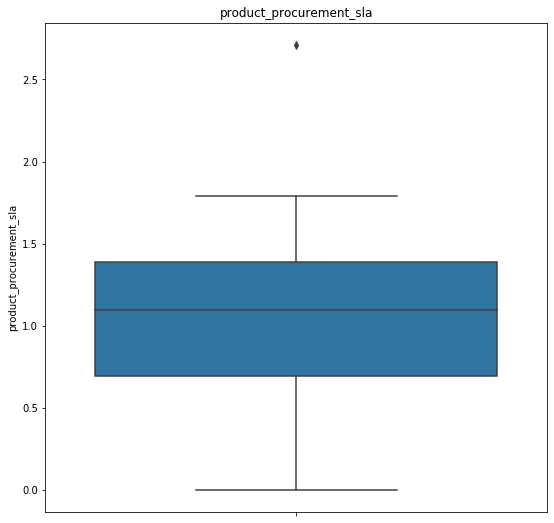

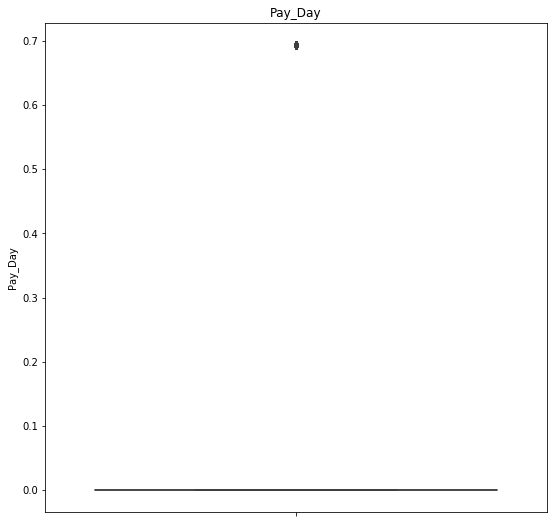

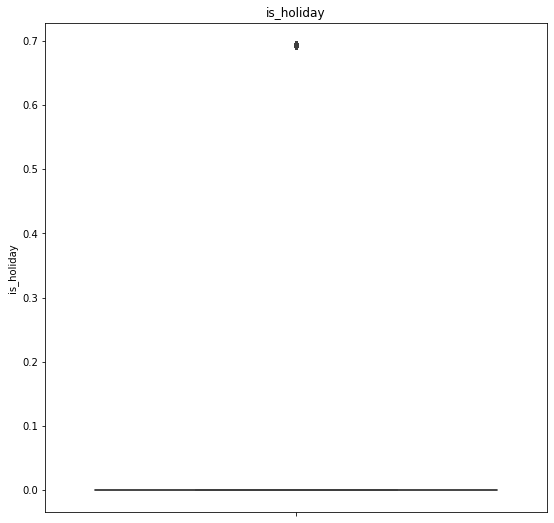

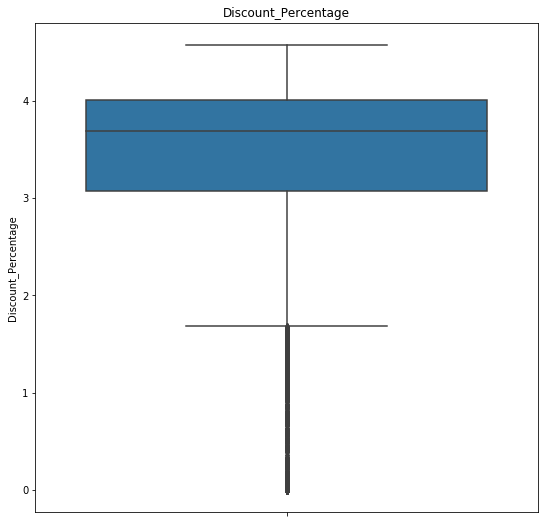

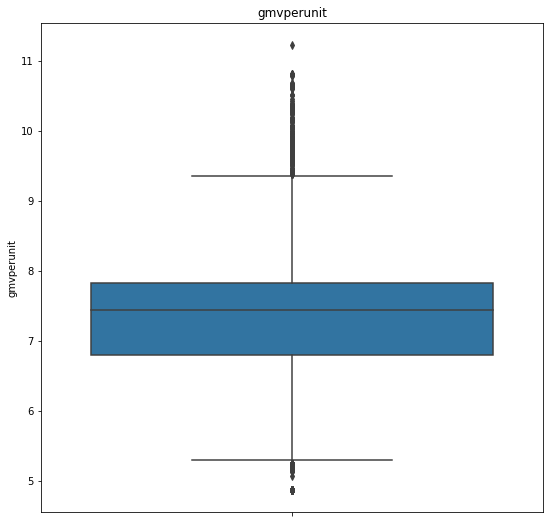

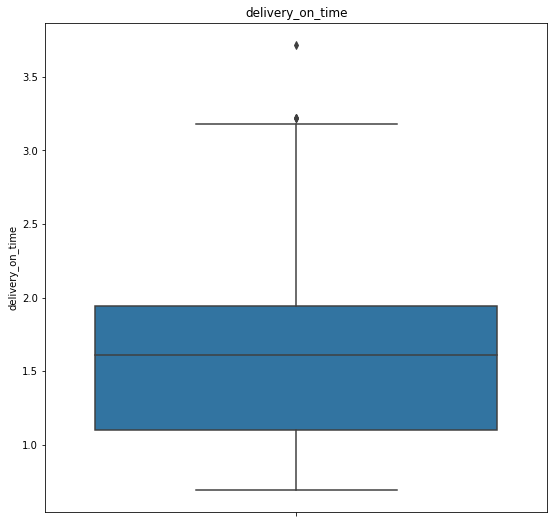

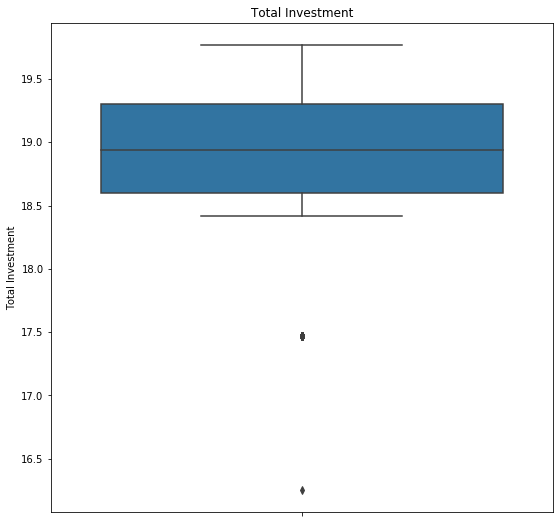

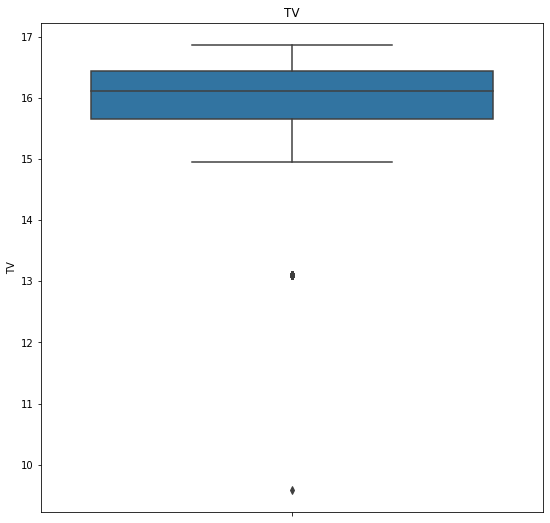

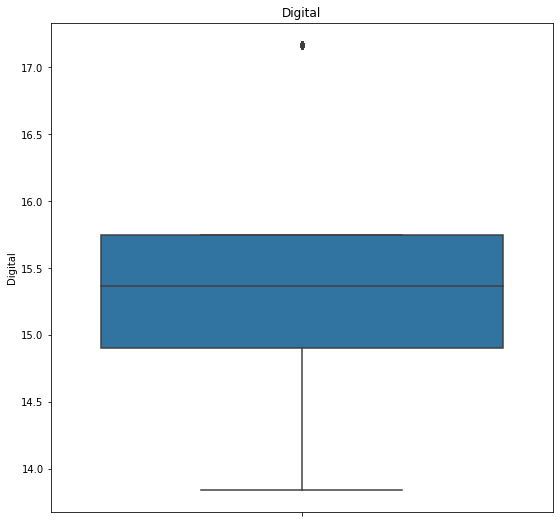

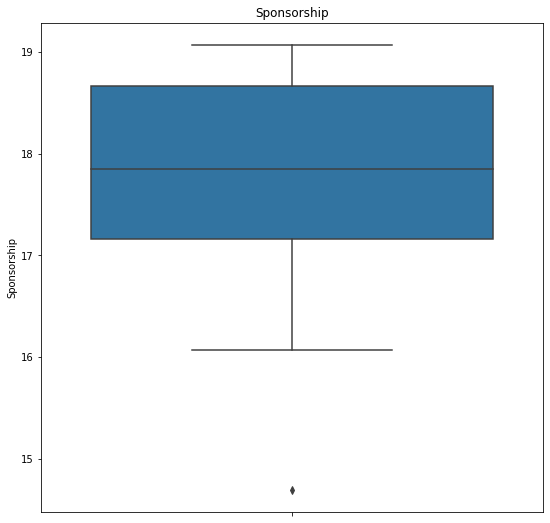

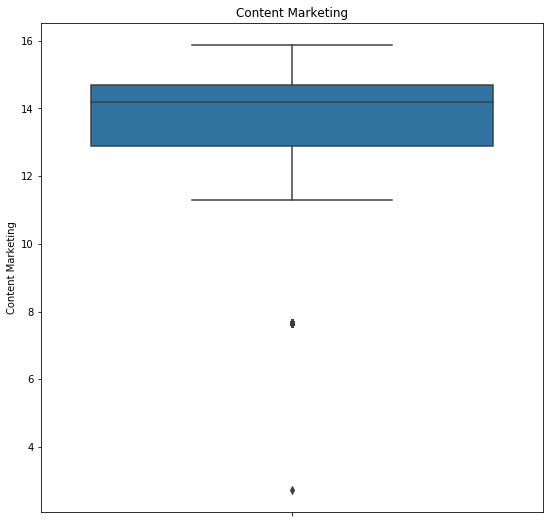

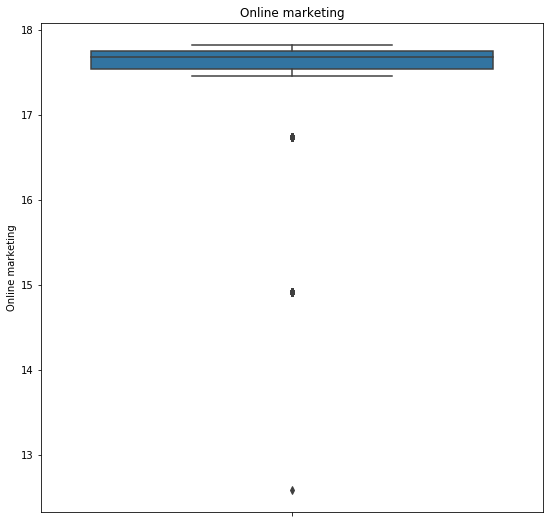

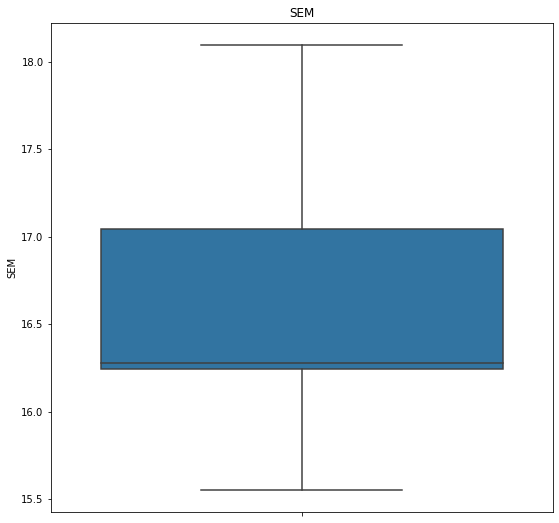

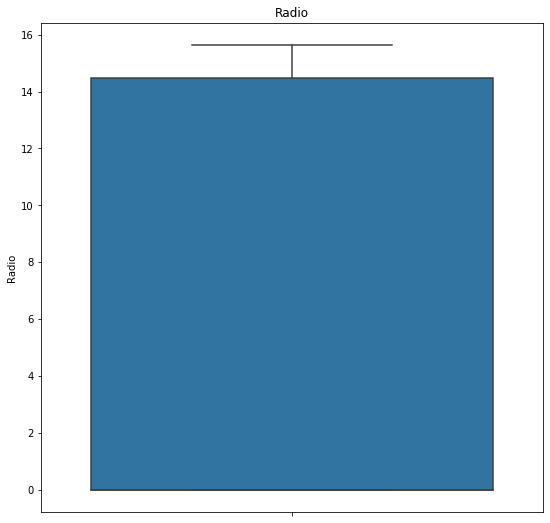

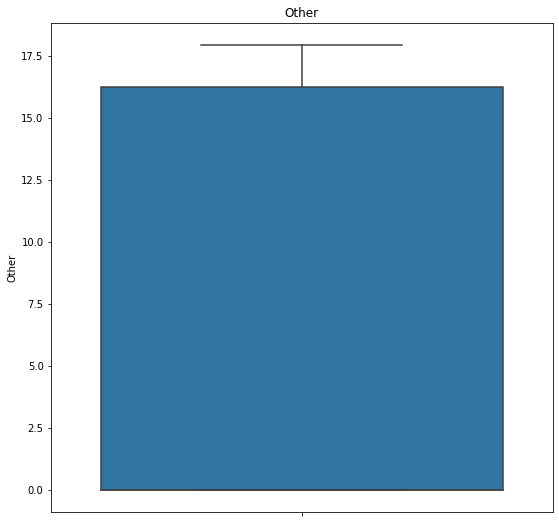

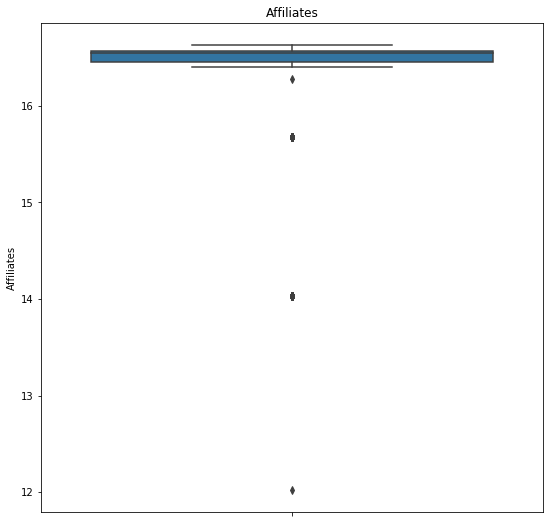

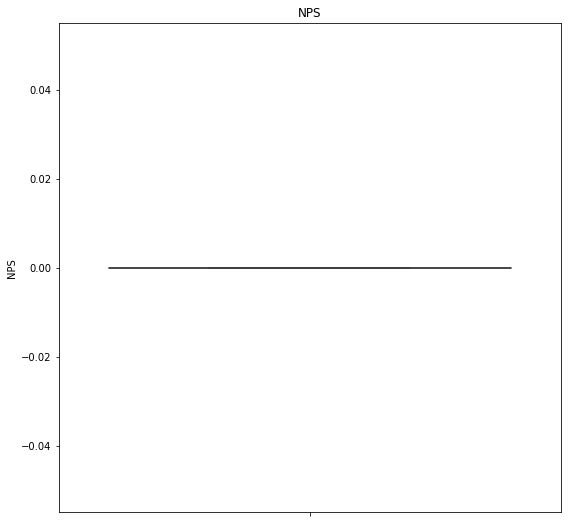

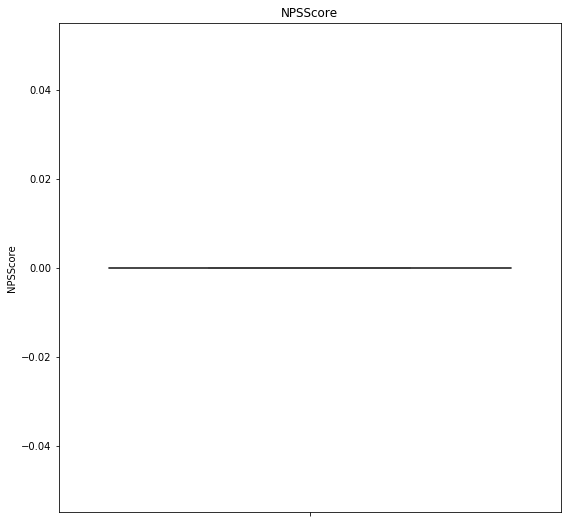

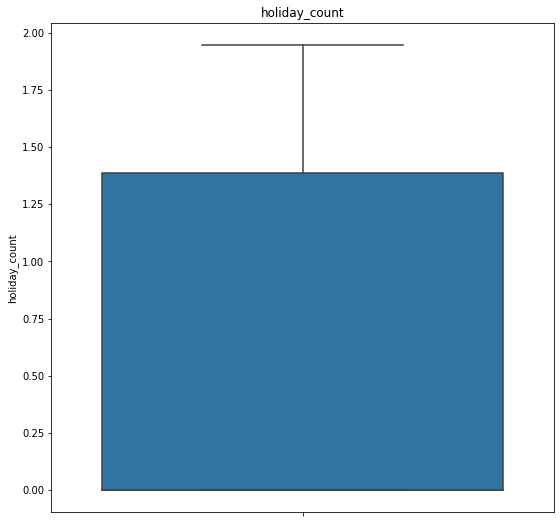

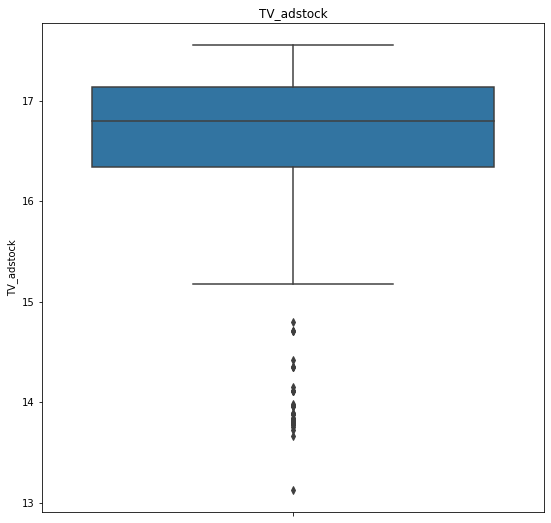

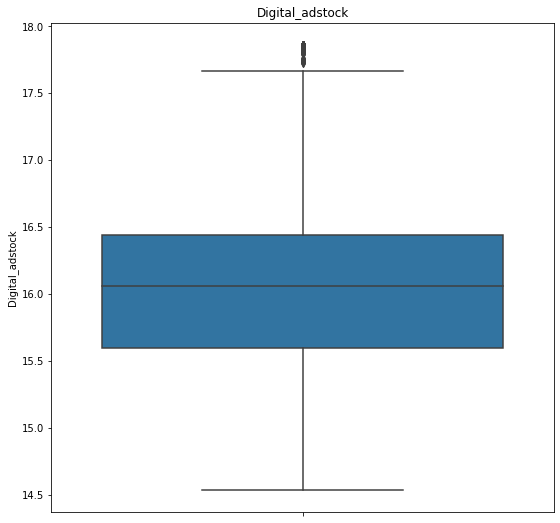

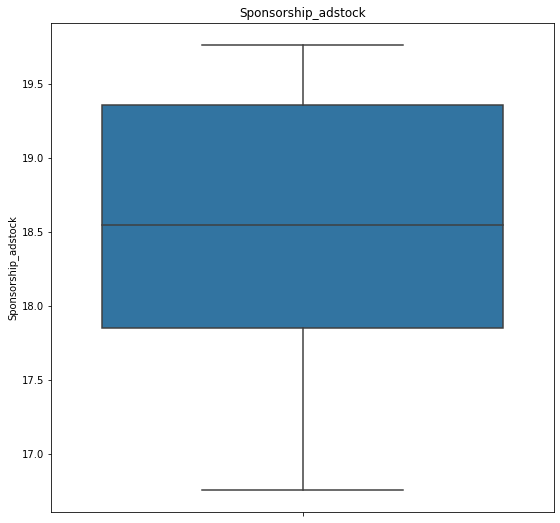

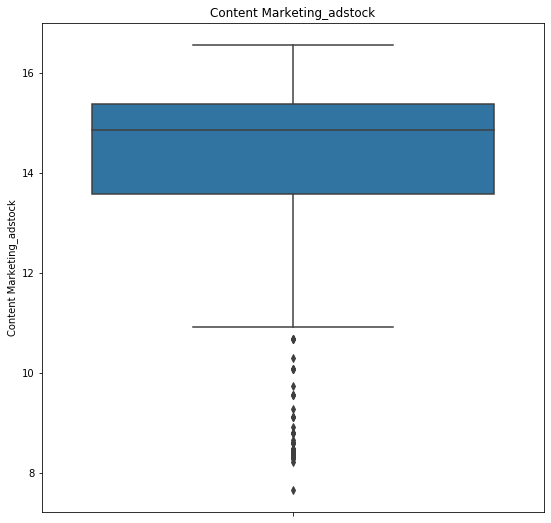

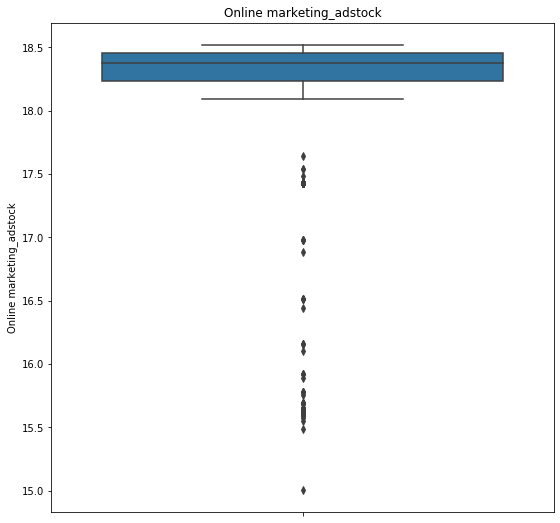

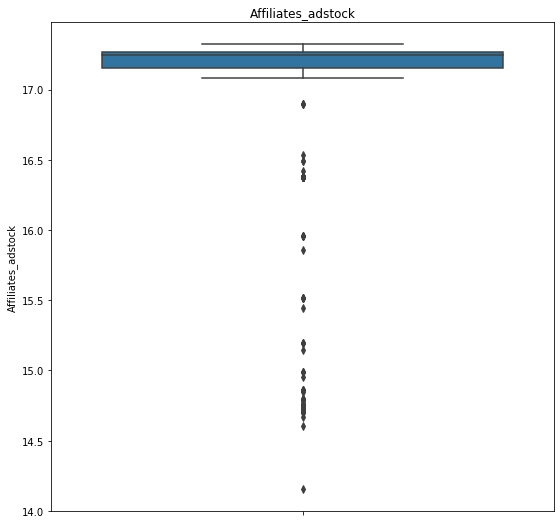

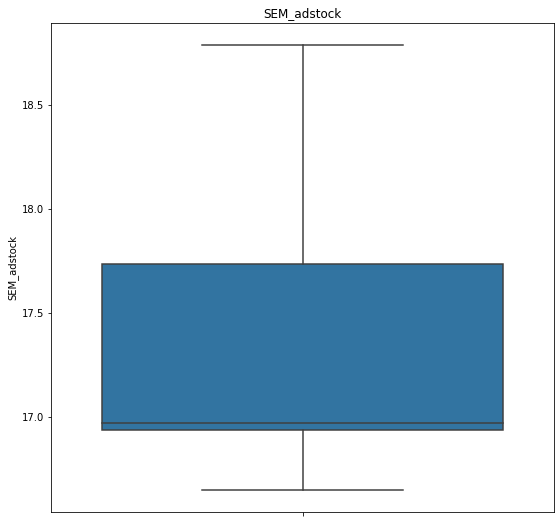

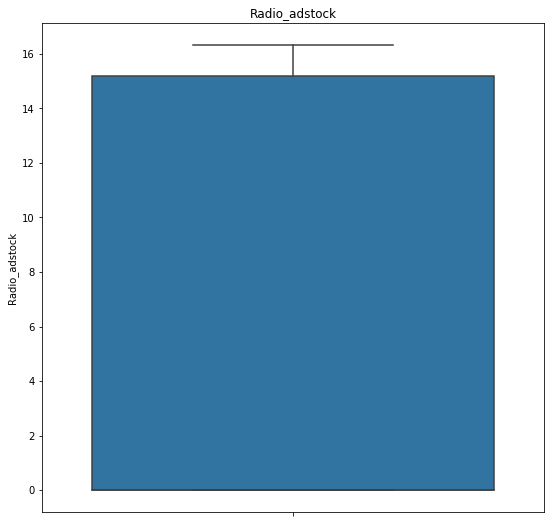

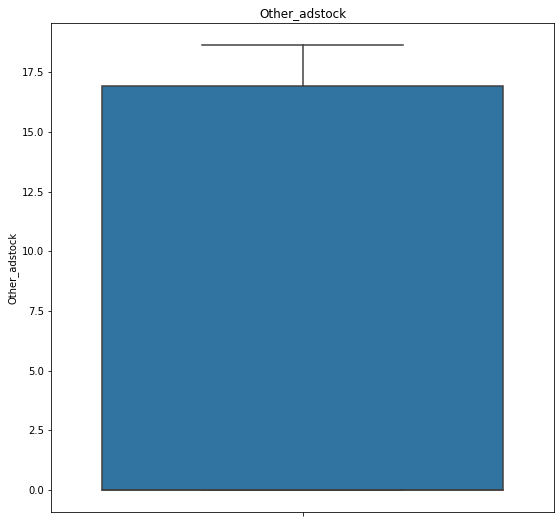

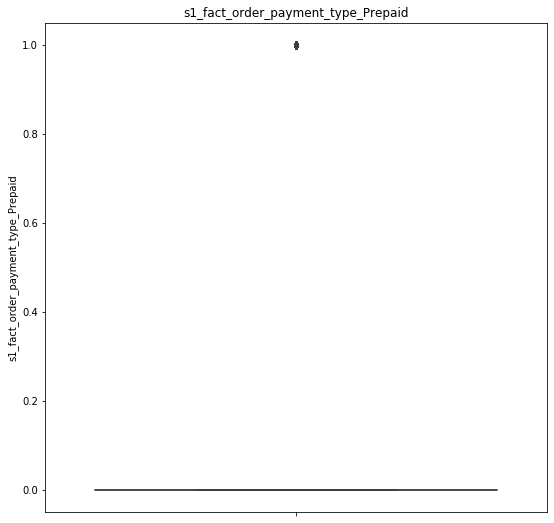

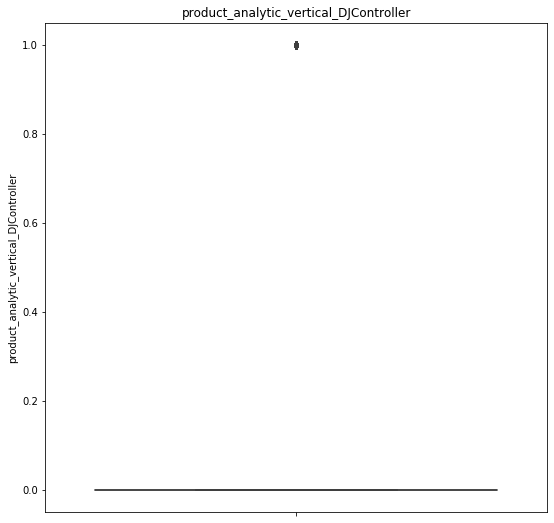

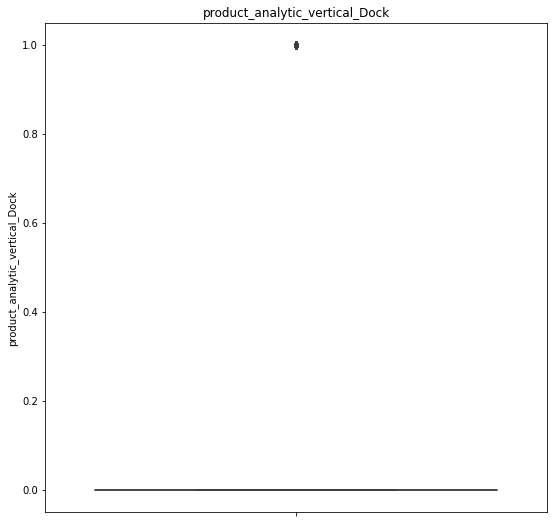

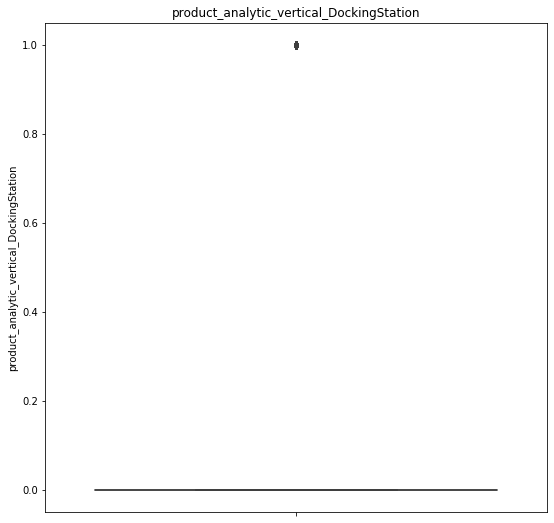

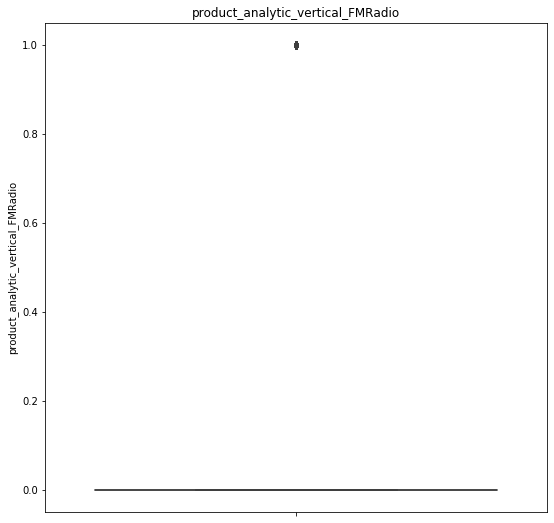

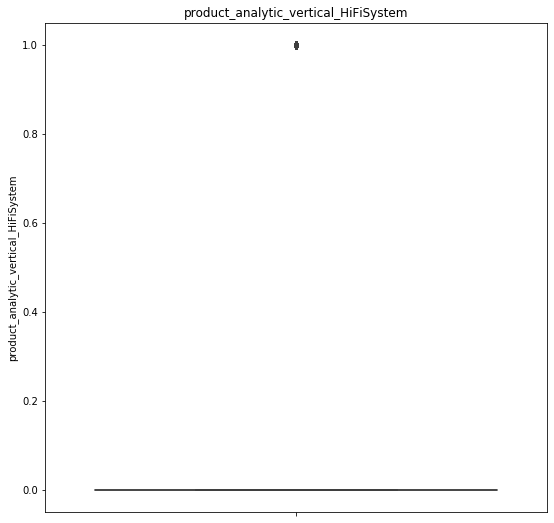

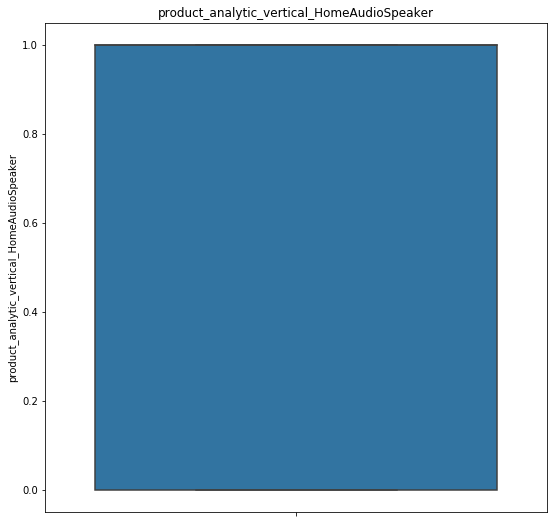

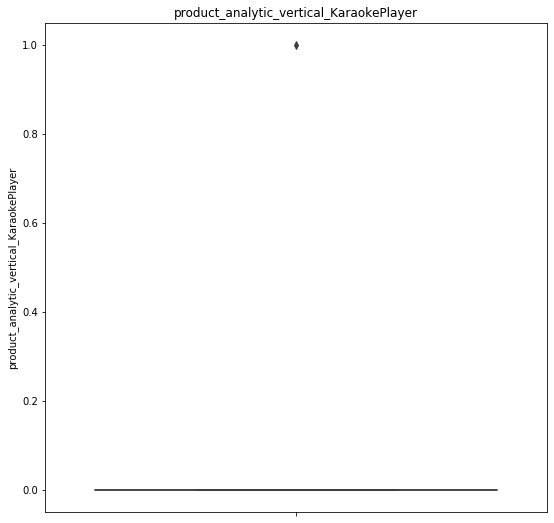

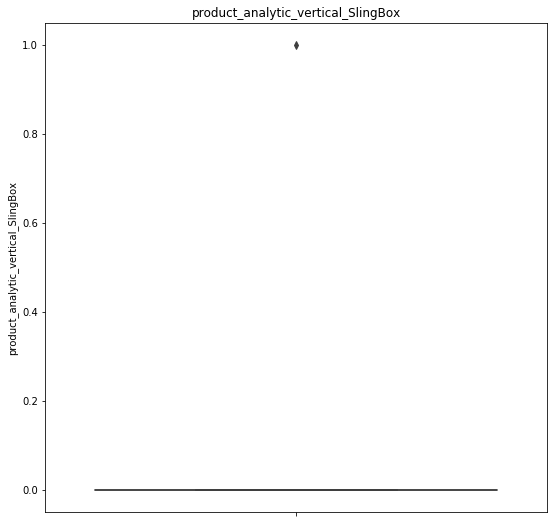

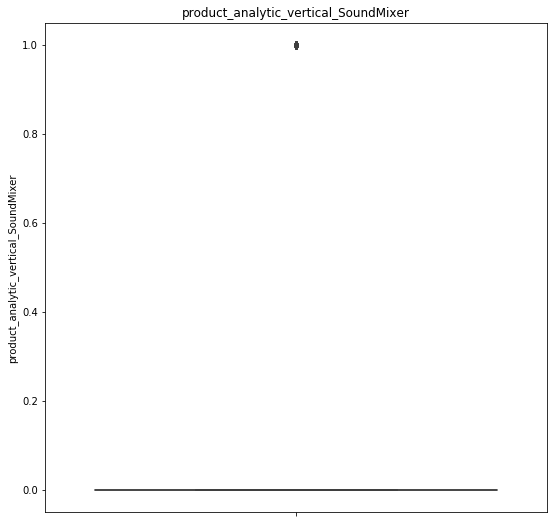

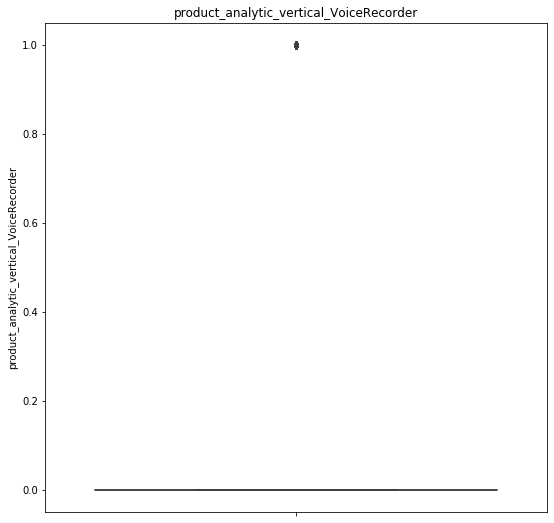

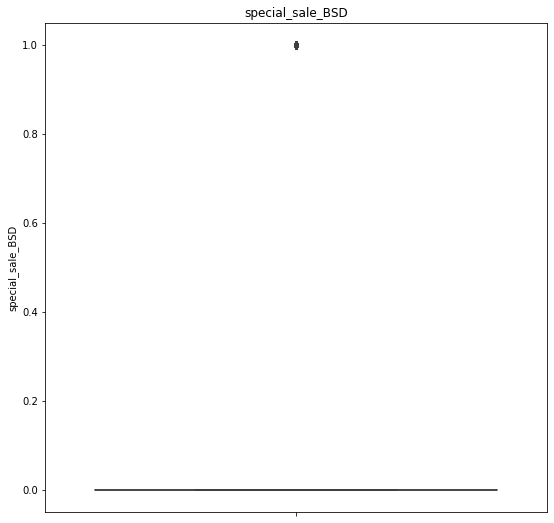

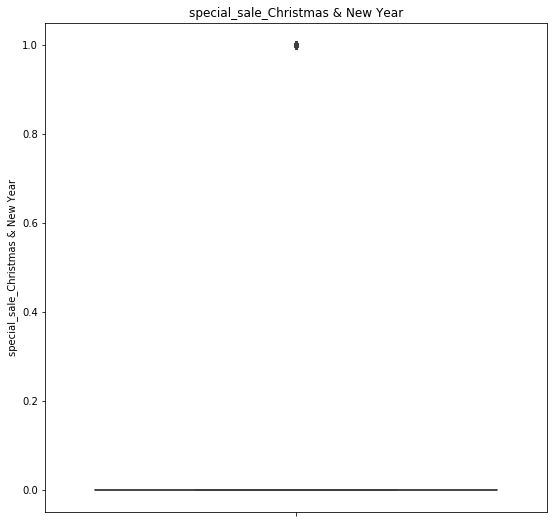

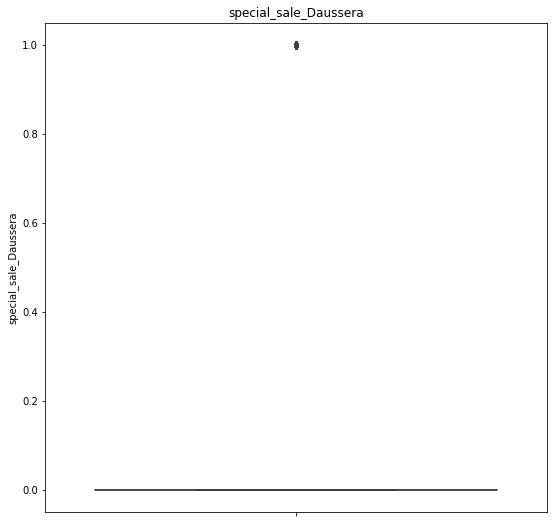

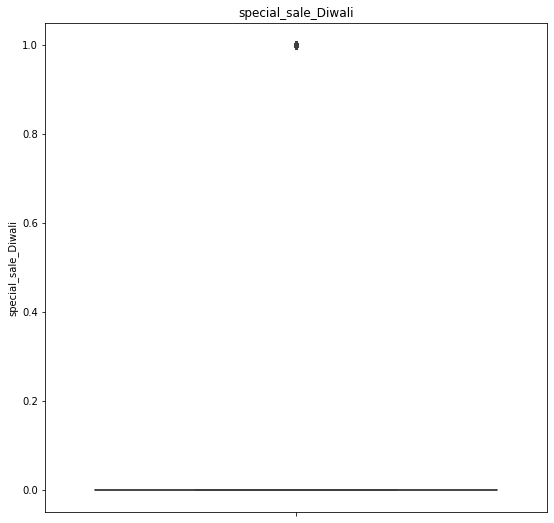

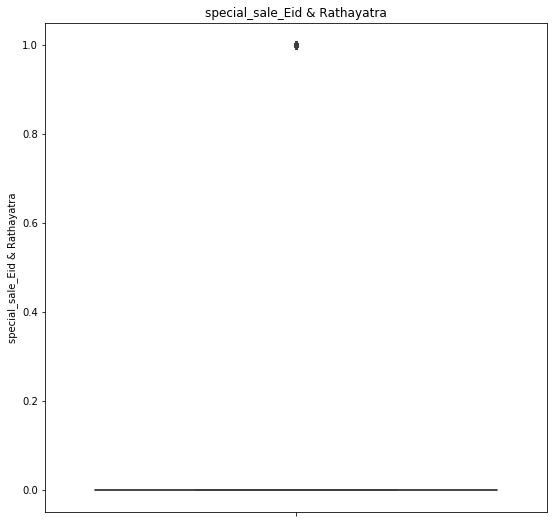

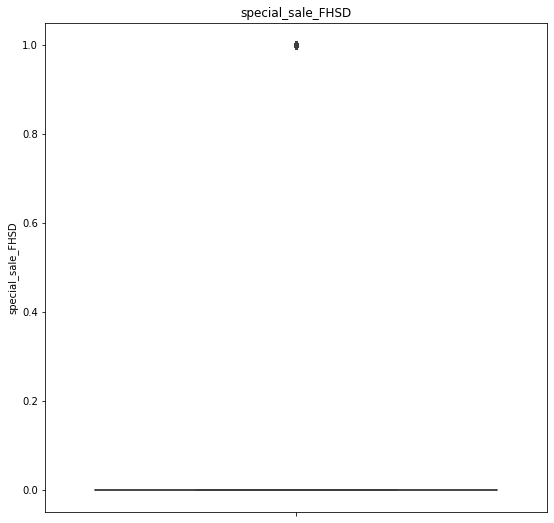

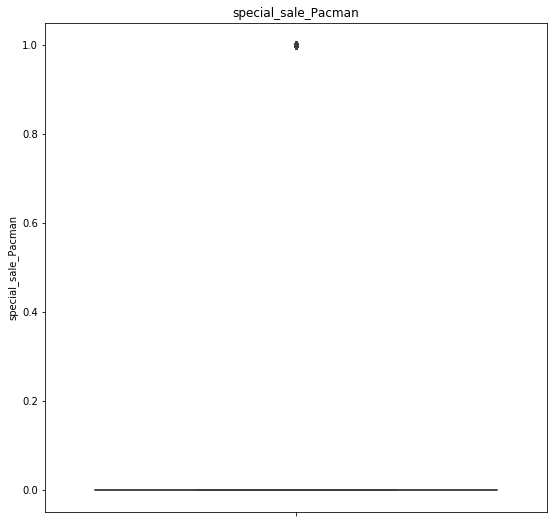

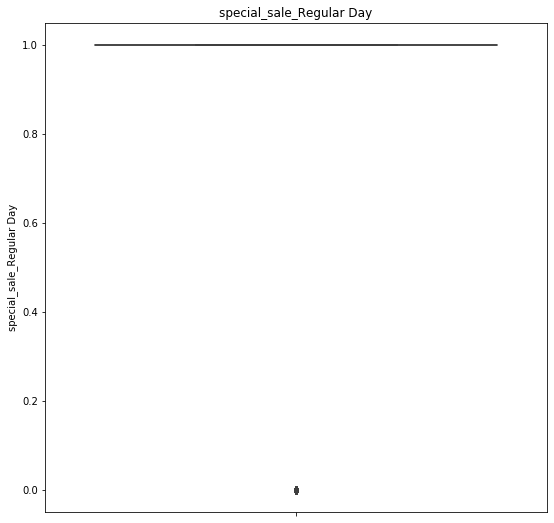

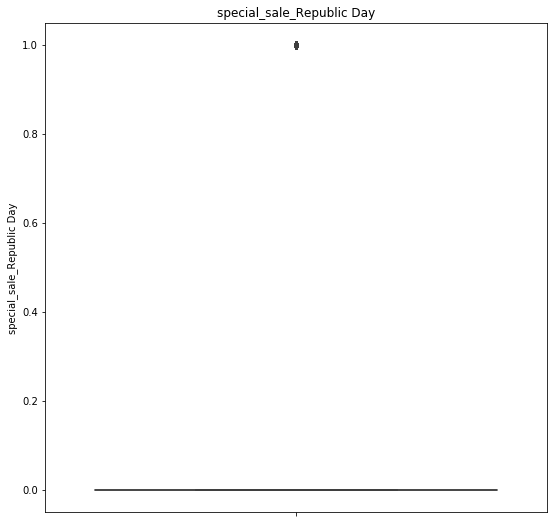

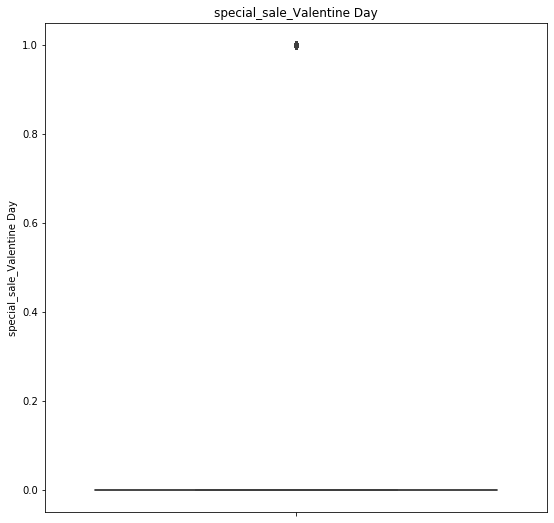

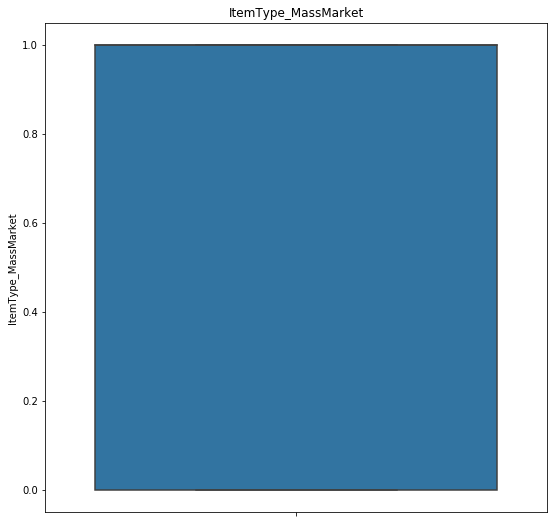

In [30]:
#Checking outliers in dataframe
for col in list(ecart_HA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ecart_HA, y=col).set_title(col)

In [31]:
#function for outlier treatment
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [32]:
#removing outliers
ecart_HA = remove_outlier(ecart_HA, 'gmv')
ecart_HA.shape

(59374, 56)

In [33]:
#removing outliers
ecart_HA = remove_outlier(ecart_HA, 'Discount_Percentage')
ecart_HA.shape

(56534, 56)

In [34]:
#removing outliers
ecart_HA = remove_outlier(ecart_HA, 'sla')
ecart_HA.shape

(55130, 56)

In [35]:
#removing outliers
ecart_HA = remove_outlier(ecart_HA, 'Affiliates')
ecart_HA.shape

(48651, 56)

In [36]:
# Import the required library
from sklearn.model_selection import train_test_split

In [37]:
#train-test split 
df_train, df_test = train_test_split(ecart_HA, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(ecart_HA_dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ecart_HA.columns:
    if col not in dum_cols:
        varlist.append(col)

In [41]:
varlist

['gmv',
 'units',
 'deliverybdays',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'Discount_Percentage',
 'gmvperunit',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'NPSScore',
 'holiday_count',
 'TV_adstock',
 'Digital_adstock',
 'Sponsorship_adstock',
 'Content Marketing_adstock',
 'Online marketing_adstock',
 'Affiliates_adstock',
 'SEM_adstock',
 'Radio_adstock',
 'Other_adstock']

In [42]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [43]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
58690,0.10,0.00,0.00,0.00,0.85,0.30,0.77,0.00,0.69,0.80,...,0,0,0,0,0,0,0,0,0,1
46999,0.10,0.00,0.00,0.00,0.58,0.30,0.77,0.00,0.00,0.81,...,0,0,0,0,0,0,1,0,0,1
57489,0.17,0.00,0.00,0.00,0.66,0.26,0.39,0.00,0.00,0.25,...,0,0,0,0,0,0,1,0,0,1
63413,0.43,0.00,0.00,0.00,0.29,0.59,0.61,0.00,0.69,0.84,...,0,0,0,0,0,0,0,0,0,1
9223,0.33,0.00,0.00,0.00,0.00,0.53,0.39,0.00,0.00,0.82,...,0,0,0,0,0,0,1,0,0,1


In [44]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [45]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
#Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.14424844e+00 -6.62812512e-02  8.63635963e-02 -2.87405469e-02
  1.02516456e-01  4.26605256e-02  1.80983211e-03 -1.09922827e-03
 -1.81763766e-02  8.04532925e-01  3.58274409e-02 -2.30108372e+11
  1.01651978e+11 -1.94485558e+11  4.00259777e+10  2.33127779e+11
 -8.05298273e+10  2.42093191e+11  1.52544903e+11 -1.34135933e+11
 -7.22700486e+10  1.52177033e+10  1.91337391e+10 -5.37178108e-04
  6.34008295e-02  3.77379787e-01 -8.93130118e-02 -1.15977870e-01
  1.13508214e+00 -8.51638717e-01 -3.93418674e-01  7.88410373e-02
 -8.04402643e-02  4.64785089e-03  7.39144741e+08  1.12299724e-02
  1.62064822e-02 -4.80978395e-02 -1.35773057e-02 -4.61262759e-02
 -1.72559307e+08  8.66860097e-02  1.08609036e-01 -2.65296004e-02
  1.33160871e-02  4.39587851e-03  7.54266021e-03  9.77909173e-03
 -3.33786011e-04  1.38921649e-02  6.20495488e-03  6.67870801e-03
  1.42148328e-02  4.63470946e-03 -1.27802208e-01]
-35237416180.717255


In [48]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False False False False False False False  True False  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[ 1 12 11 25 15 23 40 42 27  1 24  1  1  1  1  1  1  1  1  1  1  5  7 43
 18  8 14 13  4  6  9 17 16 34 21 29 28 19 26 20 32  3  2 22 33 39 36 35
 44 30 41 37 31 38 10]


In [49]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,gmvperunit,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates
58690,1.00,0.00,0.42,0.00,0.37,0.45,0.36,0.63,0.62,0.11,0.00,0.00,0.71
46999,1.00,0.00,0.42,0.31,0.61,0.00,0.00,0.71,0.83,0.00,1.00,1.00,1.00
57489,1.00,0.00,0.55,0.00,0.37,0.45,0.36,0.63,0.62,0.11,0.00,0.00,0.71
63413,1.00,0.00,0.78,0.56,1.00,0.46,0.76,0.51,0.22,0.10,0.93,0.97,0.25
9223,1.00,0.00,0.71,1.00,0.78,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.75


In [50]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.710e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:24:52   Log-Likelihood:                 43045.
No. Observations:               34055   AIC:                        -8.607e+04
Df Residuals:                   34044   BIC:                        -8.598e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.396e+07   2.43e+0

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Other,"286,600,258.08"
10,Radio,"61,325,020.30"
3,Total Investment,"3,503,181.66"
6,Sponsorship,"2,962,427.22"
4,TV,"450,484.89"
12,Affiliates,"330,677.50"
5,Digital,"94,141.30"
9,SEM,"92,222.12"
8,Online marketing,112.79
7,Content Marketing,82.47


In [53]:
#drop 1st variable with high vif and p-value
X_train_rfe1.drop('Total Investment', axis = 1, inplace = True)

In [54]:
# Refitting with 11 variables
X_train_rfe2 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.710e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:26:27   Log-Likelihood:                 43045.
No. Observations:               34055   AIC:                        -8.607e+04
Df Residuals:                   34044   BIC:                        -8.598e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.038e+08   1.03e+0

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Sponsorship,inf
7,Online marketing,inf
11,Affiliates,inf
10,Other,"3,914,349,161.93"
9,Radio,"1,063,167,571.40"
4,Digital,"347,260.19"
6,Content Marketing,"27,850.95"
8,SEM,"19,827.65"
3,TV,"15,561.49"
1,units,1.00


In [56]:
#drop 1st variable with high vif and p-value
X_train_rfe2.drop('Radio', axis = 1, inplace = True)

In [57]:
# Refitting with 11 variables
X_train_rfe3 = sm.add_constant(X_train_rfe2)

# Fitting the model with 11 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:49   Log-Likelihood:                 43044.
No. Observations:               34055   AIC:                        -8.607e+04
Df Residuals:                   34044   BIC:                        -8.597e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.065e+08   1.05e+0

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TV,inf
4,Digital,inf
5,Sponsorship,inf
6,Content Marketing,inf
7,Online marketing,inf
8,SEM,inf
9,Other,inf
10,Affiliates,inf
2,gmvperunit,1.01
1,units,1.00


In [59]:
#drop 1st variable with high vif and p-value
X_train_rfe3.drop('TV', axis = 1, inplace = True)

In [60]:
# Refitting with 11 variables
X_train_rfe4 = sm.add_constant(X_train_rfe3)

# Fitting the model with 11 variables
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.011e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:28:53   Log-Likelihood:                 43045.
No. Observations:               34055   AIC:                        -8.607e+04
Df Residuals:                   34045   BIC:                        -8.599e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3623      0.00

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,242.11
6,Online marketing,121.06
3,Digital,102.97
7,SEM,77.22
5,Content Marketing,68.40
9,Affiliates,34.88
4,Sponsorship,24.44
8,Other,12.77
2,gmvperunit,1.01
1,units,1.00


In [62]:
#drop 1st variable with high vif and p-value
X_train_rfe4.drop('Online marketing', axis = 1, inplace = True)

In [63]:
# Refitting with 11 variables
X_train_rfe5 = sm.add_constant(X_train_rfe4)

# Fitting the model with 11 variables
lm5 = sm.OLS(y_train, X_train_rfe5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.386e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:30:01   Log-Likelihood:                 43042.
No. Observations:               34055   AIC:                        -8.607e+04
Df Residuals:                   34046   BIC:                        -8.599e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3586      0.00

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.67
3,Digital,28.23
6,SEM,25.59
4,Sponsorship,23.19
8,Affiliates,23.01
5,Content Marketing,20.47
7,Other,5.90
2,gmvperunit,1.01
1,units,1.00


In [65]:
#drop 1st variable with high vif and p-value
X_train_rfe5.drop('Affiliates', axis = 1, inplace = True)

In [66]:
# Refitting with 11 variables
X_train_rfe6 = sm.add_constant(X_train_rfe5)

# Fitting the model with 11 variables
lm6 = sm.OLS(y_train, X_train_rfe6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.870e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:31:07   Log-Likelihood:                 43041.
No. Observations:               34055   AIC:                        -8.607e+04
Df Residuals:                   34047   BIC:                        -8.600e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3562      0.00

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.16
3,Digital,15.18
6,SEM,14.66
4,Sponsorship,7.95
5,Content Marketing,5.95
7,Other,2.53
2,gmvperunit,1.01
1,units,1.00


In [68]:
y_train_price = lm6.predict(X_train_rfe6)

Text(0.5, 0, 'Errors')

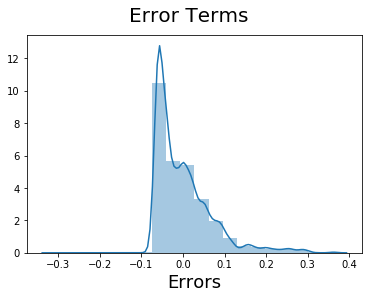

In [69]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [70]:
#fitting test data
df_test[varlist] = scaler.transform(df_test[varlist])

In [71]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [72]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe6 = X_test[col1]

In [73]:
col1

Index(['units', 'gmvperunit', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Radio',
       'Other', 'Affiliates'],
      dtype='object')

In [74]:
#Let's now drop the variables we had manually eliminated as well
X_test_rfe6 = X_test_rfe6.drop(['Total Investment','Radio','TV','Online marketing','Affiliates'], axis = 1)

In [75]:
# Add a constant to the test set created
X_test_rfe6 = sm.add_constant(X_test_rfe6)
X_test_rfe6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14596 entries, 57406 to 47858
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              14596 non-null  float64
 1   units              14596 non-null  float64
 2   gmvperunit         14596 non-null  float64
 3   Digital            14596 non-null  float64
 4   Sponsorship        14596 non-null  float64
 5   Content Marketing  14596 non-null  float64
 6   SEM                14596 non-null  float64
 7   Other              14596 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [76]:
# Making predictions
y_pred = lm6.predict(X_test_rfe6)

Text(0, 0.5, 'y_pred')

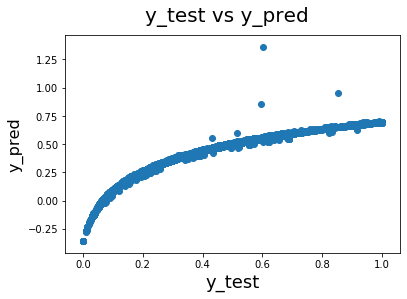

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [78]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8881591968317711

In [79]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

0.06763292087022894


In [80]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np
regr = LinearRegression()

In [81]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

[-1.20623541e+13 -3.56605604e+12  9.40359778e-01  9.40324503e-01
  9.40814823e-01] -3125682029295.4375 4676915682839.771


-915185471572947.4

In [82]:
accuracy

-4.480939253091206e+17

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [84]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
scores=cross_val_score(lm,X_train,y_train,scoring='r2',cv=folds)
scores

array([ 9.40293659e-01, -6.57506580e+13,  9.43841304e-01, -1.53460498e+11,
        9.41973958e-01])

In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9414519589094006
0.0


In [86]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020CF91A0308>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.9044391019938212
0.005461011441028174


In [87]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [88]:
# model with optimal alpha
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8487806955329094
0.8492620037689764


In [89]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.199),
 ('units', 0.0),
 ('deliverybdays', 0.0),
 ('deliverycdays', 0.0),
 ('sla', -0.0),
 ('product_mrp', 0.0),
 ('product_procurement_sla', 0.0),
 ('Pay_Day', -0.0),
 ('is_holiday', 0.0),
 ('Discount_Percentage', -0.0),
 ('gmvperunit', 0.433),
 ('delivery_on_time', -0.0),
 ('Total Investment', 0.0),
 ('TV', -0.0),
 ('Digital', 0.0),
 ('Sponsorship', 0.0),
 ('Content Marketing', 0.0),
 ('Online marketing', 0.0),
 ('SEM', 0.0),
 ('Radio', -0.0),
 ('Other', -0.0),
 ('Affiliates', -0.0),
 ('NPS', 0.0),
 ('NPSScore', 0.0),
 ('holiday_count', 0.0),
 ('TV_adstock', -0.0),
 ('Digital_adstock', 0.0),
 ('Sponsorship_adstock', 0.0),
 ('Content Marketing_adstock', 0.0),
 ('Online marketing_adstock', 0.0),
 ('Affiliates_adstock', -0.0),
 ('SEM_adstock', 0.0),
 ('Radio_adstock', -0.0),
 ('Other_adstock', -0.0),
 ('s1_fact_order_payment_type_Prepaid', 0.0),
 ('product_analytic_vertical_DJController', 0.0),
 ('product_analytic_vertical_Dock', -0.0),
 ('product_analytic_vertical_Dockin